<a href="https://colab.research.google.com/github/ekloberdanz/AI-Checkers/blob/master/SoftmaxStability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Stability Experiments with Softmax Function



$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j}^{ }exp(x_j))}$$


$$LogSoftmax(x)_i = log(\frac{exp(x_i)}{\sum_{j}^{ }exp(x_j))})$$

In [23]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [62]:
#Softmax - various versions

def softmax_unstable(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

# more stable, but still risk of underflow in numerator
def softmax_more_stable(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def log_softmax_unstable_v1(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def log_softmax_unstable_v2(x):
    e_x = np.exp(x)
    return np.log(e_x / e_x.sum())

# the most stable version
def log_softmax_stable(x):
    c = np.max(x)
    logsumexp = np.log(np.exp(x - c).sum())
    return x - c - logsumexp

##When the input into sofmax is not very negative and not very positive, there are no stability issues due to underflow and overflow.

y =  [1.82921579e-01 1.49461275e-01 1.22121583e-01 9.97829100e-02
 8.15304625e-02 6.66167816e-02 5.44311347e-02 4.44745056e-02
 3.63391588e-02 2.96919425e-02 2.42606455e-02 1.98228499e-02
 1.61968229e-02 1.32340745e-02 1.08132767e-02 8.83529506e-03
 7.21912894e-03 5.89859447e-03 4.81961426e-03 3.93800281e-03
 3.21765712e-03 2.62907820e-03 2.14816306e-03 1.75521768e-03
 1.43415049e-03 1.17181342e-03 9.57463460e-04 7.82322732e-04
 6.39219023e-04 5.22292070e-04 4.26753580e-04 3.48691141e-04
 2.84908007e-04 2.32792185e-04 1.90209471e-04 1.55416054e-04
 1.26987104e-04 1.03758422e-04 8.47787680e-05 6.92709019e-05
 5.65997592e-05 4.62464418e-05 3.77869697e-05 3.08749175e-05
 2.52272289e-05 2.06126243e-05 1.68421305e-05 1.37613414e-05
 1.12440951e-05 9.18730750e-06 7.50675071e-06 6.13360401e-06
 5.01163548e-06 4.09489921e-06 3.34585378e-06 2.73382492e-06
 2.23374935e-06 1.82514839e-06 1.49128937e-06 1.21850036e-06
 9.95610352e-07 8.13491735e-07 6.64686542e-07 5.43101031e-07
 4.43756133e-07 3.6

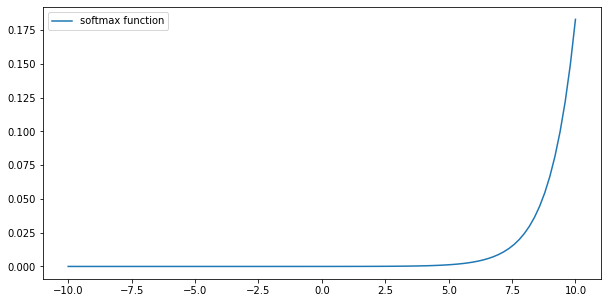

In [24]:
x = np.linspace(10, -10, 100)
y = softmax_unstable(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

## Stability of various softmax function versions

y =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


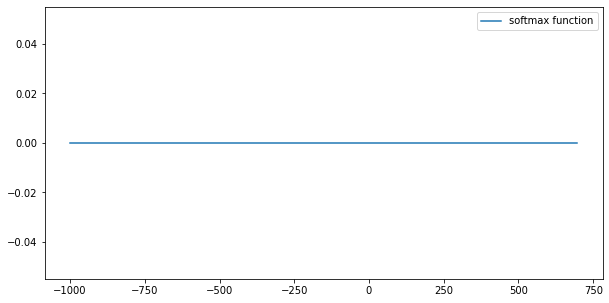

In [28]:
x = np.linspace(-1000, 1000, 100)
y = softmax_unstable(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

y =  [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.0

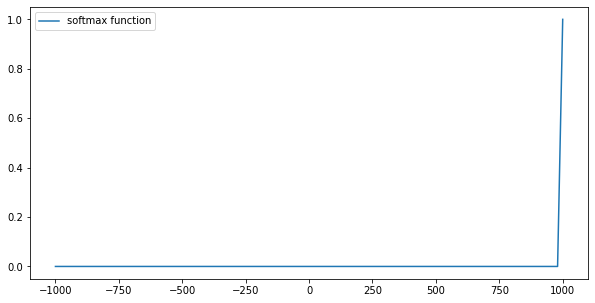

In [25]:
x = np.linspace(-1000, 1000, 100)
y = softmax_more_stable(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

y =  [           -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf            -inf            -inf            -inf
            -inf    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


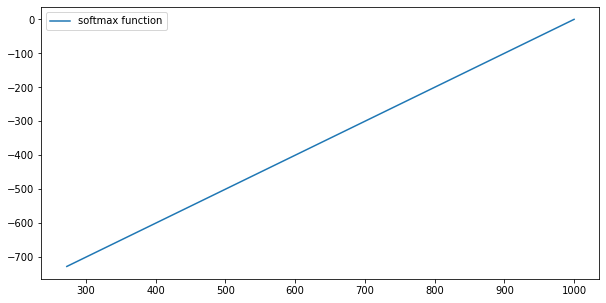

In [33]:
x = np.linspace(-1000, 1000, 100)
y = log_softmax_unstable_v1(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

y =  [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


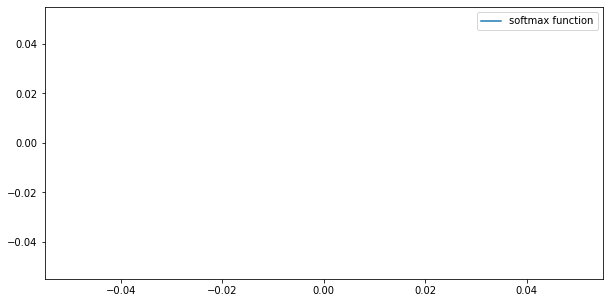

In [35]:
x = np.linspace(-1000, 1000, 100)
y = log_softmax_unstable_v2(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

y =  [-2.00000000e+03 -1.97979798e+03 -1.95959596e+03 -1.93939394e+03
 -1.91919192e+03 -1.89898990e+03 -1.87878788e+03 -1.85858586e+03
 -1.83838384e+03 -1.81818182e+03 -1.79797980e+03 -1.77777778e+03
 -1.75757576e+03 -1.73737374e+03 -1.71717172e+03 -1.69696970e+03
 -1.67676768e+03 -1.65656566e+03 -1.63636364e+03 -1.61616162e+03
 -1.59595960e+03 -1.57575758e+03 -1.55555556e+03 -1.53535354e+03
 -1.51515152e+03 -1.49494949e+03 -1.47474747e+03 -1.45454545e+03
 -1.43434343e+03 -1.41414141e+03 -1.39393939e+03 -1.37373737e+03
 -1.35353535e+03 -1.33333333e+03 -1.31313131e+03 -1.29292929e+03
 -1.27272727e+03 -1.25252525e+03 -1.23232323e+03 -1.21212121e+03
 -1.19191919e+03 -1.17171717e+03 -1.15151515e+03 -1.13131313e+03
 -1.11111111e+03 -1.09090909e+03 -1.07070707e+03 -1.05050505e+03
 -1.03030303e+03 -1.01010101e+03 -9.89898990e+02 -9.69696970e+02
 -9.49494949e+02 -9.29292929e+02 -9.09090909e+02 -8.88888889e+02
 -8.68686869e+02 -8.48484848e+02 -8.28282828e+02 -8.08080808e+02
 -7.87878788e+02 -7.

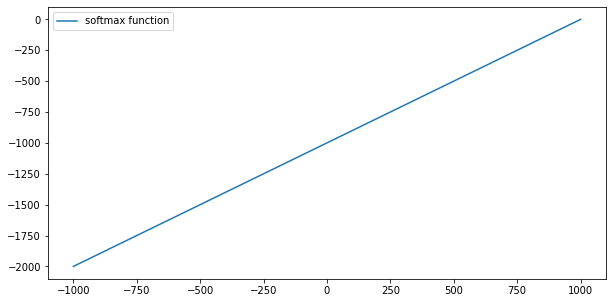

In [61]:
x = np.linspace(-1000, 1000, 100)
y = log_softmax(x)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

## Pytorch implementation

y =  tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, 1.4108e-316, 8.3771e-308,
        4.9742e-299, 2.9536e-290, 1.7538e-281,

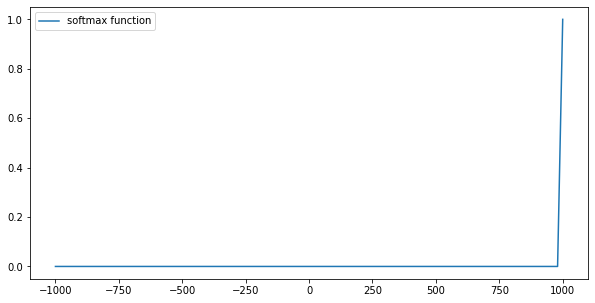

In [57]:
x = torch.from_numpy(np.linspace(-1000, 1000, 100))
y = F.softmax(x, dim=0)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()

y =  tensor([-2.0000e+03, -1.9798e+03, -1.9596e+03, -1.9394e+03, -1.9192e+03,
        -1.8990e+03, -1.8788e+03, -1.8586e+03, -1.8384e+03, -1.8182e+03,
        -1.7980e+03, -1.7778e+03, -1.7576e+03, -1.7374e+03, -1.7172e+03,
        -1.6970e+03, -1.6768e+03, -1.6566e+03, -1.6364e+03, -1.6162e+03,
        -1.5960e+03, -1.5758e+03, -1.5556e+03, -1.5354e+03, -1.5152e+03,
        -1.4949e+03, -1.4747e+03, -1.4545e+03, -1.4343e+03, -1.4141e+03,
        -1.3939e+03, -1.3737e+03, -1.3535e+03, -1.3333e+03, -1.3131e+03,
        -1.2929e+03, -1.2727e+03, -1.2525e+03, -1.2323e+03, -1.2121e+03,
        -1.1919e+03, -1.1717e+03, -1.1515e+03, -1.1313e+03, -1.1111e+03,
        -1.0909e+03, -1.0707e+03, -1.0505e+03, -1.0303e+03, -1.0101e+03,
        -9.8990e+02, -9.6970e+02, -9.4949e+02, -9.2929e+02, -9.0909e+02,
        -8.8889e+02, -8.6869e+02, -8.4848e+02, -8.2828e+02, -8.0808e+02,
        -7.8788e+02, -7.6768e+02, -7.4747e+02, -7.2727e+02, -7.0707e+02,
        -6.8687e+02, -6.6667e+02, -6.4646e+02,

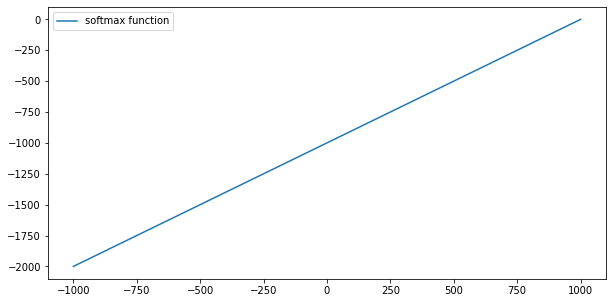

In [58]:
x = torch.from_numpy(np.linspace(-1000, 1000, 100))
y = F.log_softmax(x, dim=0)
print("y = ", y)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['softmax function'])
plt.show()